# Linear Algebra Portfolio Exercises

## Reduced Row Echolon Form (1)
This is an example of an algorithm that turns a 4x4 matrix to echelon form.
This algorithm can be used to determine if a matrix is a singular matrix or e.g., to solve linear equations.

We require the first element to be 1 since reduced row echelon form is:

$$ M = \begin{bmatrix}
1 & a & b & c \\
0 & 1 & d & e \\
0 & 0 & 1 & f \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

So we check for that, and if it is 0, we add another line to get a non-0 value. We repeat this process for every row if the first element (0, 0) is still 0. If it is, we have a singular matrix and raise a corresponding error. If not, we divide the row by the value we wanted to be 1 in order to get the number to be one since a number divided by itself is 1.

For row one, we try to set the first element 0. We do that by taking the product of our value (1, 0) times the first row. We do that because we know that the first row has a 1 in that place, and so our value at (1, 0) minus the first row times the value will equal to 0. After that, we check if the second value in the diagonal (1, 1) is 0 in order to do the same thing as for row 0. After adding a lower row, we have to set the first element to 0 again since a lower row could have changed it. If there is still a 0 after all rows have been tried, we rais the singular matrix error again. Otherwise, we divide the row by the value we want to be one. 

We do the same for the second row, only that now we have two values to set to 0. And at last, the same for the last row, only that there are three values to set to 0.

Exercise source: Coursera Course

In [1]:
import numpy as np

def echelon_form(A):
    
    # ROW ZERO
    
    if A[0,0] == 0 :
        A[0] = A[0] + A[1]
    if A[0,0] == 0 :
        A[0] = A[0] + A[2]
    if A[0,0] == 0 :
        A[0] = A[0] + A[3]
    if A[0,0] == 0 :
        raise MatrixIsSingular()
    A[0] = A[0] / A[0,0]
    
    # ROW ONE
    
    A[1] = A[1] - A[1,0] * A[0]
    if A[1,1] == 0 :
        A[1] = A[1] + A[2]
        A[1] = A[1] - A[1,0] * A[0]
    if A[1,1] == 0 :
        A[1] = A[1] + A[3]
        A[1] = A[1] - A[1,0] * A[0]
    if A[1,1] == 0 :
        raise MatrixIsSingular()
    A[1] = A[1] / A[1,1]
    
    # ROW TWO
    
    A[2] = A[2] - A[2,0] * A[0]
    A[2] = A[2] - A[2,1] * A[1]
    
    if A[2,2] == 0 :
        A[2] = A[2] + A[3]
        A[2] = A[2] - A[2,0] * A[0]
        A[2] = A[2] - A[2,1] * A[1]
        
    if A[2,2] == 0:
        raise MatrixIsSingular()
    A[2] = A[2] / A[2,2]
    
    # ROW THREE
    
    A[3] = A[3] - A[3,0] * A[0] 
    A[3] = A[3] - A[3,1] * A[1]
    A[3] = A[3] - A[3,2] * A[2]
    
    if A[3,3] == 0:
        raise MatrixIsSingular()
    A[3] = A[3] / A[3,3]
    
    return A

In [2]:
A = np.array([
        [0, 7, -5, 3],
        [2, 8, 0, 4],
        [3, 12, 0, 5],
        [1, 3, 1, 3]
    ], dtype=np.float_)
echelon_form(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 0.        ,  0.        ,  1.        ,  1.5       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

## Gram-Schmidt-Algorithm (2)
This is the Gram-Schmidt algorithm in code.

A is the matrix with our initial vector set.
We start by making a copy of A in order to be able to alter its values. Then we loop through our matrix and apply the Gram-Schmidt algorithm to all vectors. We then get a vector set B with our new vectors. If a vector is linearly dependent, it will be set to 0, otherwise, we normalize it.

Exercise source: me

In [3]:
import numpy as np
import numpy.linalg as la

In [4]:
verySmallNumber = 1e-14 # That's 1×10⁻¹⁴ = 0.00000000000001

def gram_schmidt(A) :
    B = np.array(A, dtype=np.float_)
    for i in range(B.shape[1]) :
        for j in range(i) :
            B[:, i] = B[:, i] - B[:, i] @ B[:, j] * B[:, j]
        if la.norm(B[:, i]) > verySmallNumber :
            B[:, i] = B[:, i] / la.norm(B[:, i])
        else :
            B[:, i] = np.zeros_like(B[:, i])
            
        
            
    # Finally, we return the result:
    return B

## Change of Basis and Transformation (3)
In this exercise, we apply a change of basis to reflect a picture in a mirror. This mirror is along the first axis, and the problem is that the second basis vector is not orthonormal to the mirror (first axis), meaning that the matrix is not a simple diagonal matrix.

To use a diagonal matrix, we need to change the basis to an orthonormal set of vectors. This is what this exercise is doing.
We first use the Gram-Schmidt algorithm of the last exercise to generate a new set based on the basis vectors that are not orthonormal. Then we apply our transformation matrix.

Exercise source: Coursera course

In [5]:
import numpy as np
from numpy.linalg import norm, inv
from numpy import transpose
from bearNecessities import *

In [6]:
def build_reflection_matrix(bearBasis, transformation):
    E = gram_schmidt(bearBasis)
    
    TE = transformation
    
    T = E@TE@inv(E)
    
    return T

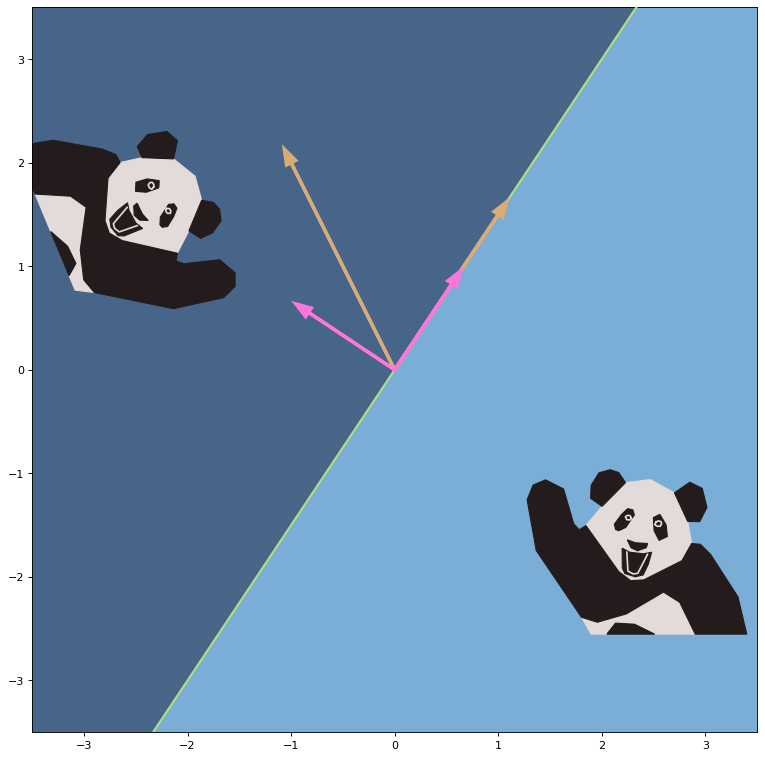

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

bearBasis = np.array(
    [[1,   -1],
     [1.5, 2]])

transformation = np.array(
    [[1,   0],
     [0, -1]])

T = build_reflection_matrix(bearBasis, transformation)

reflected_bear_white_fur = T @ bear_white_fur
reflected_bear_black_fur = T @ bear_black_fur
reflected_bear_face = T @ bear_face

ax = draw_mirror(bearBasis)

ax.fill(bear_white_fur[0], bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(bear_black_fur[0], bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(bear_face[0], bear_face[1], color=bear_white, zorder=3)

ax.fill(reflected_bear_white_fur[0], reflected_bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(reflected_bear_black_fur[0], reflected_bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(reflected_bear_face[0], reflected_bear_face[1], color=bear_white, zorder=3);

## A Determinant of 0 (3.1)
At this point, I want to show the importance of the determinant for a, in this case, graphical transformation. Our transformation matrix above has a determinant of -1. If we use random values for our transformation matrix, we could get a matrix with a determinant of 0. As we discussed in the portfolio, this means that we would squish the space in a smaller dimension. This would mean that we would not get a second picture of the panda. Since the space is either squished onto a line or in a point.

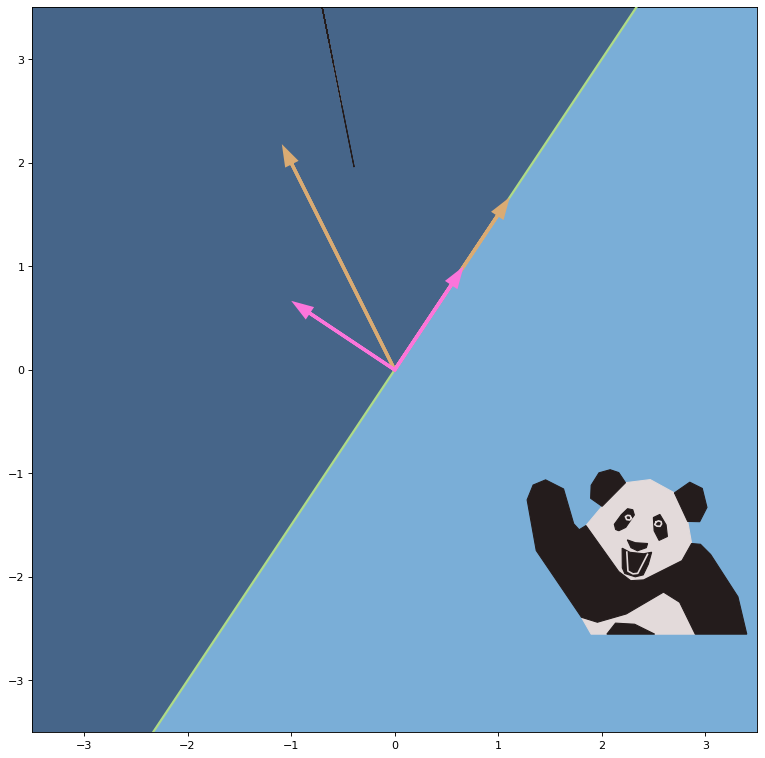

In [8]:
bearBasis = np.array(
    [[1,   -1],
     [1.5, 2]])

# determinant of 0
transformation = np.array(
    [[1,   -1],
     [1, -1]])

T = build_reflection_matrix(bearBasis, transformation)

reflected_bear_white_fur = T @ bear_white_fur
reflected_bear_black_fur = T @ bear_black_fur
reflected_bear_face = T @ bear_face

ax = draw_mirror(bearBasis)

ax.fill(bear_white_fur[0], bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(bear_black_fur[0], bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(bear_face[0], bear_face[1], color=bear_white, zorder=3)

ax.fill(reflected_bear_white_fur[0], reflected_bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(reflected_bear_black_fur[0], reflected_bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(reflected_bear_face[0], reflected_bear_face[1], color=bear_white, zorder=3);

As we can see above, the new transformation matrix squished the picture of the panda onto a line. The determinant can be used to either achieve this or prevent this as we know that it has to be 0 to do something like this or not 0 in order not to vanish the panda picture.

## Page Rank (4)

This is a light version of the page rank algorithm of Google. It does what google is most famous for: Ranking pages in order from the most to the least probable one.
It does this by measuring the importance of a website. A website is more important if there are many links to this website because the probability of someone clicking randomly through the internet will more likely end on this website.

Our internet user is modeled as a vector that has a value, which is a probability he is going to any specific site. In the beginnning, it will be the same probability for all websites.

$$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$

We then have a transformation matrix L that has a column for each website, and the row-values of this column are the probabilities that this website will redirect to another website.

$$ L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}
$$

To calculate our ranking, we have to multiply our matrix L with our vector r.

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$

We have to do that until there is no more change and which means that we have the principal eigenvector of our matrix L. This is called the power method, but for larger systems, like the internet, it is faster than to calculate the principal eigenvector otherwise.

$$ L \,\mathbf{r} = \mathbf{r}$$

Another parameter we include is called the damping parameter. This is the probability that our user doesn't follow a link but types in a random website by URL. This prevents "overfitting" and gives a more realistic result. The probability of clicking on a link is d, meaning that the probability of choosing a random website is 1 - d. We divide this probability by n in order to have the same probability for all websites. J is an n x n matrix where every element is one. Our final transformation matrix looks as following:

$$ M = d \, L + \frac{1-d}{n} \, J $$

Exercise source: Coursera course

In [1]:
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)

In [2]:
def generate_internet(n) :
    c = np.full([n,n], np.arange(n))
    c = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(c - c.T) + 1)) + 0
    c = (c+1e-10) / np.sum((c+1e-10), axis=0)
    return c

def page_rank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    
    r = np.ones(n) / n

    lastR = r
    r = M @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = M @ r
        i += 1
    print(str(i) + " iterations to convergence.")
    
    return r

In [3]:
r = generate_internet(100)

eigen_r = page_rank(r, 0.9)

4 iterations to convergence.


In the next chart, we can see the ranking of the websites. Like in real life, there are only a few websites that are really popular, but most websites are less popular. The left number gives the percentage where our internet user will spend his time.

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


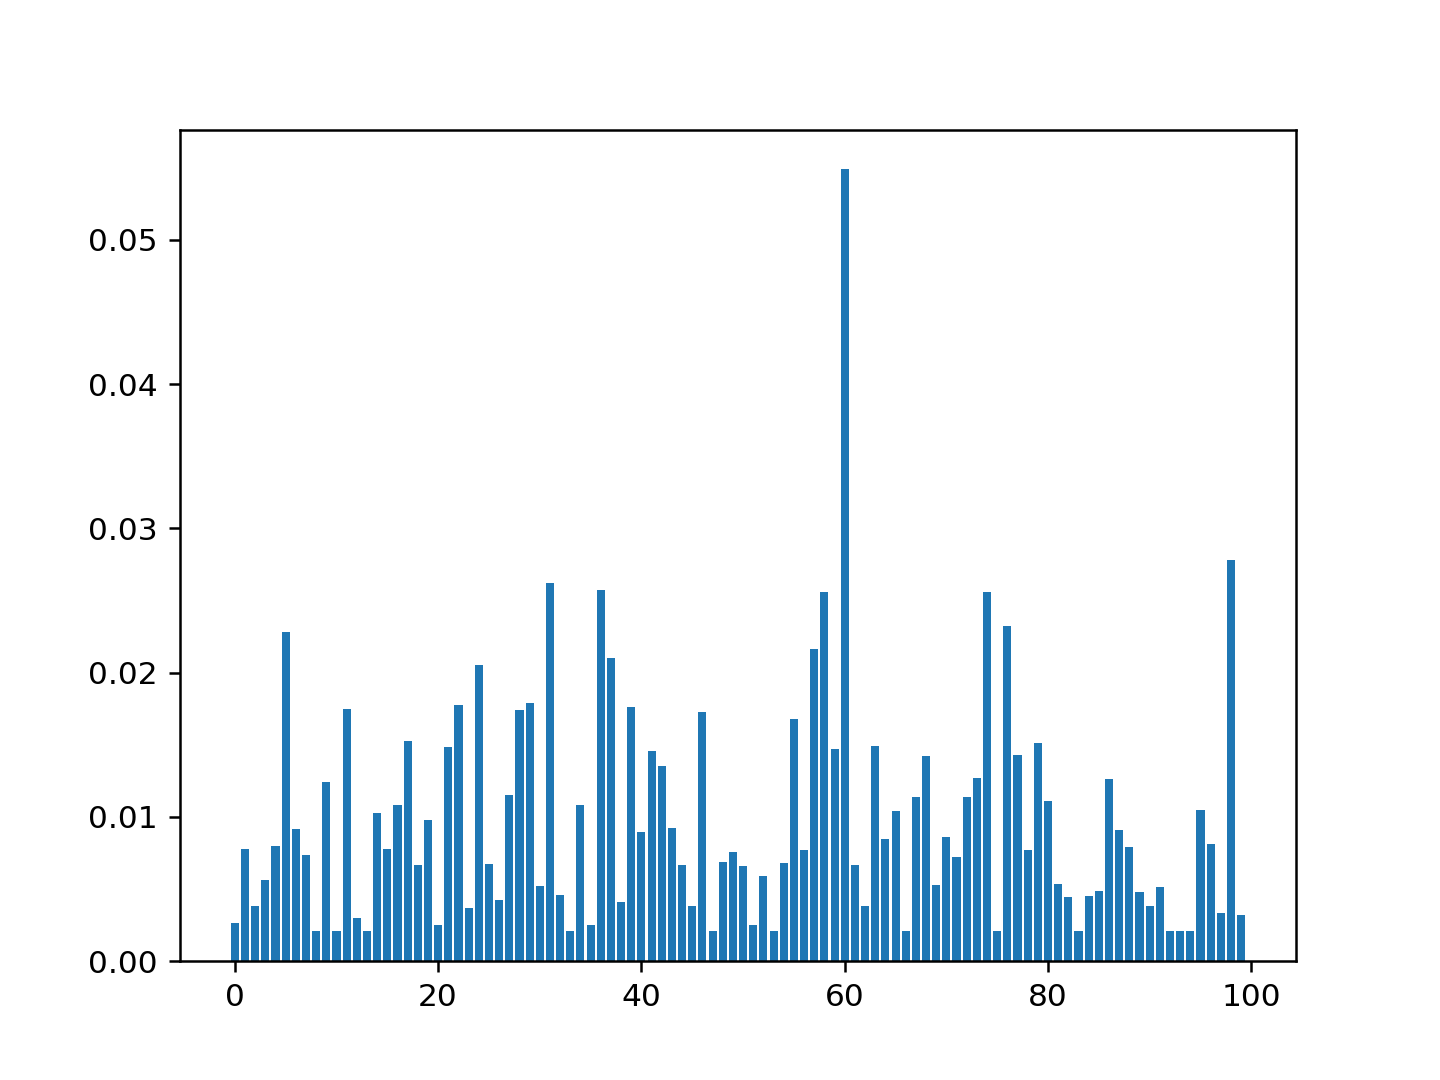

In [5]:
%pylab notebook
plt.bar(arange(r.shape[0]), eigen_r);